In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
# Load images
image1 = cv2.imread('./notre1.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('./notre2.jpg', cv2.IMREAD_GRAYSCALE)

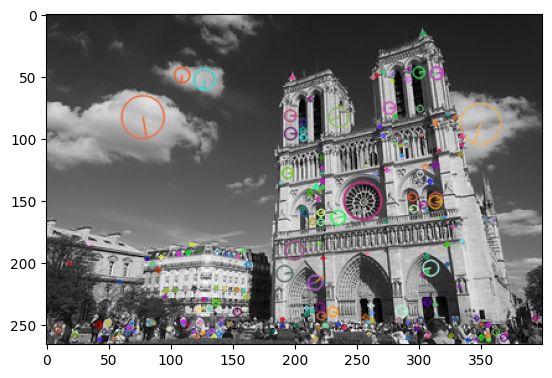

In [ ]:
# Image 1 keypoints
# TODO: create  manual keypoints at [(255,150,30), (200,190,15)] and display

sift = cv2.SIFT_create(nfeatures=150)

#kp1 = [cv2.KeyPoint(x=255, y=150, size=30), cv2.KeyPoint(x=200, y=190, size=15)] #assuming keypoints are given to us, or else we have to use some detector like blobs
kp1=sift.detect(image1)
#computing the descriptor
des1=sift.compute(image1,kp1)


image1 = cv2.drawKeypoints(image1, kp1, -1, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(image1)





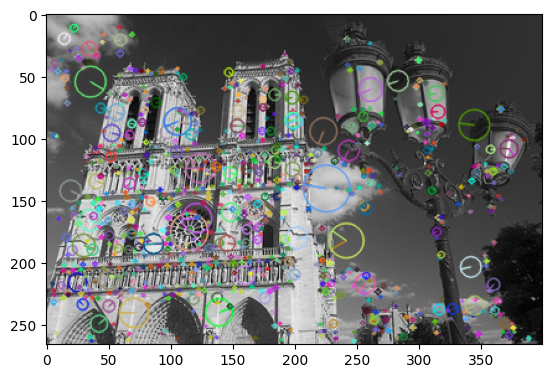

In [ ]:
# Image 2 keypoints
# TODO: create  manual keypoints at [(115, 175, 30), (168,155, 15), (25,216,15), (50,214,15), (160,210,15)] and display

#kp2 = [cv2.KeyPoint(x=115, y=175, size=30), cv2.KeyPoint(x=168, y=155, size=15),cv2.KeyPoint(x=25, y=216, size=15),cv2.KeyPoint(x=50, y=214, size=15),cv2.KeyPoint(x=160, y=210, size=15)]
kp2=sift.detect(image2)
#print(kp2[0].pt)
#computing the descriptor
des2=sift.compute(image2,kp2)

image2 = cv2.drawKeypoints(image2, kp2, -1, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(image2)



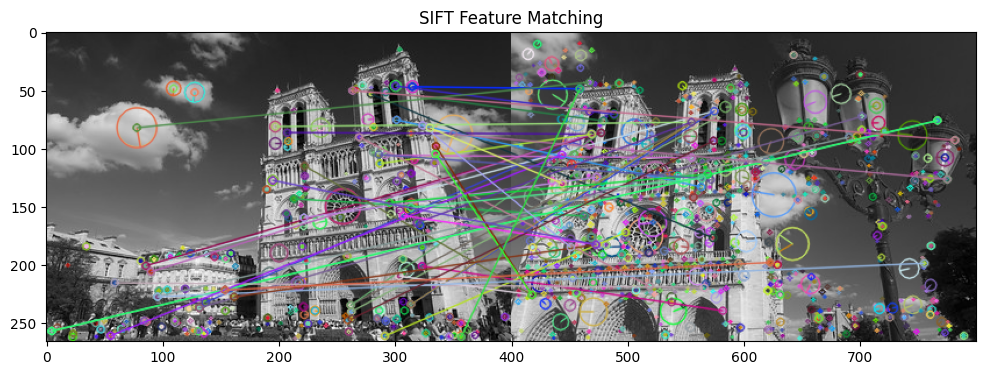

In [ ]:
# Draw the Matched keyponts
bf = cv2.BFMatcher()
matches = bf.match(des1[1], des2[1]) # index 0 is keypoint and index 1 is descriptor


matches = sorted(matches, key=lambda x: x.distance)
img_matches = cv2.drawMatches(image1, kp1, image2, kp2, matches[:50],
                              cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)



# Plot the matches using Matplotlib
plt.figure(figsize = (12,8))
plt.imshow(img_matches)
plt.title('SIFT Feature Matching')
plt.show()


## Nearest Neighbor Distance Ratio
Nearest Neighbor Distance Ratio = $\frac{NN1}{NN2}$

where NN1 is the distance to the first nearest neighbor and NN2 is the distance to the second nearest neighbor.

Sorting by this ratio puts matches in order of confidence.
Keep only those matches where $\frac{NN1}{NN2}$  < some threshold



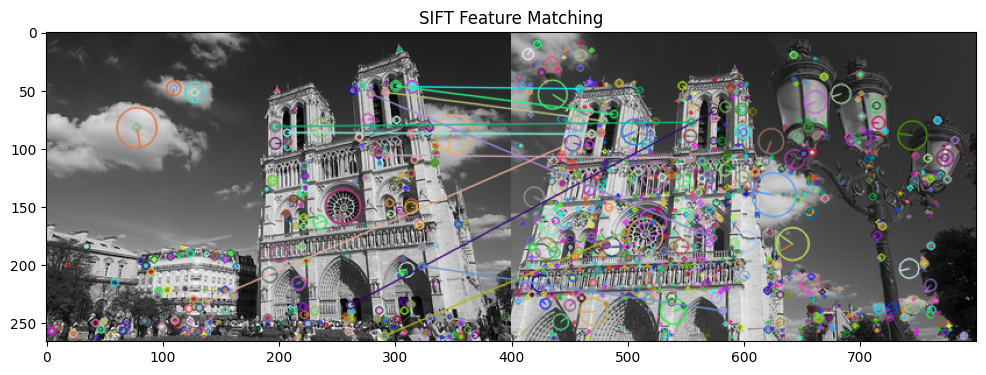

In [ ]:
# TODO
# Keep only those matches where Nearest Neighbor Distance Ratio is less than 0.8

#trainIdx= which keypoint it matched to
#queryIdx=which keypoint is being matched

matches1=bf.knnMatch(des1[1],des2[1],k=2) # get two nearest neighbours for each keypoint in the image1

good=[]
for m,n in matches1:   #m is the next closest
    if m.distance<0.8*n.distance:
        good.append(m)

# NDD1=matches1[0][0].distance/matches1[0][1].distance
# print(NDD1)

img_matches1 = cv2.drawMatches(image1, kp1, image2, kp2, good,
                              cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


# Plot the matches using Matplotlib
plt.figure(figsize = (12,8))
plt.imshow(img_matches1)
plt.title('SIFT Feature Matching')
plt.show()


